In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import random

from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

drive_path = '/content/drive/MyDrive/Kuliah/Tugas Akhir/Final Project Shared Folder'
data_path = "Dataset/Data Versioning/"
model_path = "Model/ML Model/"
data_version = "Trained_V2-2.csv"
base_url = "https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?CycleBeginYear=2017"
dataset_names = ['Demographics', 'Dietary', 'Examination', 'Laboratory', 'Questionnaire']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_raw = pd.read_csv(os.path.join(drive_path, data_path+data_version), index_col = 0)
try:
  df_raw = df_raw.set_index('SEQN', drop=True)
  df_raw = df_raw.drop(columns = "Unnamed: 0")
except:
  pass

df_raw.head()

,Dieta1_DR1TKCAL,Exami2_BMXBMI,Dieta1_DR1TCARB,Dieta1_DR1TFIBE,Dieta1_DR1TSFAT,Dieta1_DR1TTFAT,Dieta1_DR1TPFAT,Dieta1_DR1TCALC,Quest6_DED125,Dieta1_DR1TMFAT,...,Labor2_URDFLOW1,Quest17_DPQ040,Demog1_DMDHHSZE,Quest16_MCQ010,Quest16_MCQ160B,Quest16_MCQ220,Quest16_MCQ300C,Quest16_MCQ300A,Quest16_MCQ366A,Quest16_MCQ366B
SEQN,,,,,,,,,,,,,,,,,,,,,
93703.0,0,0,1,1,1,0,1,2,1,1,...,0.895435,9.000000e+00,5.397605e-79,2.0,1.0,9.0,9.0,9.0,9.0,9.0
93704.0,0,0,0,0,0,0,1,1,1,0,...,0.895435,9.000000e+00,5.397605e-79,2.0,1.0,9.0,9.0,9.0,9.0,9.0
93705.0,0,3,0,0,1,1,2,0,1,1,...,1.204000,5.397605e-79,1.000000e+00,1.0,2.0,2.0,1.0,2.0,2.0,2.0
93706.0,2,1,0,0,3,3,3,1,2,3,...,0.783489,5.397605e-79,1.000000e+00,2.0,1.0,9.0,9.0,9.0,2.0,2.0
93707.0,1,0,1,1,3,2,1,0,1,3,...,0.526000,9.000000e+00,5.397605e-79,2.0,1.0,9.0,9.0,9.0,9.0,9.0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def prep_data(df):
  X = df.copy().drop(columns=['Quest16_MCQ160B'])
  y = df['Quest16_MCQ160B']

  y = y.replace({2: 0})
  y = y.replace({9: 0})

  y = y.astype(int)

  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_val = scaler.transform(X_val)

  X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
  X_val = np.array(X_val).reshape(X_val.shape[0], X_val.shape[1], 1)

  print("Train: ", X_train.shape, " ", y_train.shape)
  print("Val: ", X_val.shape, " ", y_val.shape)
  print("Column Used: ", X.columns.tolist())

  return X_train, X_val, y_train, y_val

X_train, X_val, y_train, y_val = prep_data(df_raw)

Train:  (6477, 85, 1)   (6477,)
Val:  (2777, 85, 1)   (2777,)
Column Used:  ['Dieta1_DR1TKCAL', 'Exami2_BMXBMI', 'Dieta1_DR1TCARB', 'Dieta1_DR1TFIBE', 'Dieta1_DR1TSFAT', 'Dieta1_DR1TTFAT', 'Dieta1_DR1TPFAT', 'Dieta1_DR1TCALC', 'Quest6_DED125', 'Dieta1_DR1TMFAT', 'Quest21_SLQ330', 'Quest21_SLD013', 'Quest21_SLQ300', 'Quest19_PAQ635', 'Quest19_PAD615', 'Quest19_PAQ640', 'Quest21_SLQ320', 'Quest21_SLD012', 'Dieta1_DRDINT', 'Quest19_PAQ610', 'Quest19_PAQ655', 'Dieta1_DR1DAY', 'Dieta1_DR1TPROT', 'Quest6_DED120', 'Quest19_PAD645', 'Dieta1_DR1TCHOL', 'Quest19_PAD660', 'Dieta1_DR1TSUGR', 'Demog1_RIDRETH3', 'Demog1_DMDMARTL', 'Quest14_INQ012', 'Demog1_DMDHHSZA', 'Quest15_KIQ026', 'Quest9_DLQ050', 'Demog1_DMDHHSIZ', 'Exami1_BPXPULS', 'Quest18_OCQ210', 'Demog1_INDIN2', 'Demog1_RIDAGEYR', 'Quest15_KIQ022', 'Quest20_PFQ061C', 'Quest4_CBD111', 'Quest7_DIQ010', 'Quest14_IND235', 'Demog1_DMDEDUC', 'Quest10_ECQ020', 'Labor1_LBDTCSI', 'Quest17_DPQ020', 'Quest3_CDQ008', 'Quest14_INQ020', 'Demog1_DMDFMSIZ

In [ ]:
from pprint import pprint
pprint(X_train)

array([[[-0.4522637 ],
        [-0.44670257],
        [ 0.44269283],
        ...,
        [ 1.19737358],
        [-0.6221094 ],
        [-0.58528205]],

       [[ 1.3382693 ],
        [ 1.34314743],
        [ 0.44269283],
        ...,
        [-0.79162476],
        [-0.91237036],
        [-0.87016007]],

       [[ 1.3382693 ],
        [ 1.34314743],
        [ 0.44269283],
        ...,
        [-0.79162476],
        [-0.6221094 ],
        [-0.58528205]],

       ...,

       [[-1.3475302 ],
        [-1.34162756],
        [-0.45502835],
        ...,
        [ 1.19737358],
        [ 1.4097173 ],
        [ 1.4088641 ]],

       [[-0.4522637 ],
        [-0.44670257],
        [ 0.44269283],
        ...,
        [ 1.19737358],
        [ 1.4097173 ],
        [ 1.4088641 ]],

       [[ 1.3382693 ],
        [ 1.34314743],
        [ 1.340414  ],
        ...,
        [-0.79162476],
        [-0.6221094 ],
        [-0.58528205]]])


# Create Model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin

class CNNModel(BaseEstimator, ClassifierMixin):
  def __init__(
      self,
      input_shape,
      layer_metadata,
      convolution_part=['conv1d'],
      intermediate_part=['flatten'],
      dense_part=['dense'],
      convolution_hyperparameter=[{'filters':16, 'kernel_size':3, 'activation':'relu'}],
      intermediate_hyperparameter=[{}],
      dense_hyperparameter=[{'units':32, 'activation':'relu'}],
      optimizer='adam'
  ):
    self.input_shape = input_shape
    self.layer_metadata = layer_metadata
    self.convolution_part = convolution_part
    self.intermediate_part = intermediate_part
    self.dense_part = dense_part
    self.convolution_hyperparameter = convolution_hyperparameter
    self.intermediate_hyperparameter = intermediate_hyperparameter
    self.dense_hyperparameter = dense_hyperparameter
    self.optimizer = optimizer
    self.model = self.build_model(input_shape, convolution_part, intermediate_part, dense_part, convolution_hyperparameter, intermediate_hyperparameter, dense_hyperparameter, optimizer)



  def build_model(
      self,
      input_shape,
      convolution_part,
      intermediate_part,
      dense_part,
      convolution_hyperparameter,
      intermediate_hyperparameter,
      dense_hyperparameter,
      optimizer,
  ):

    def fix_hyperparameter_type(layer, hyperparameter, layer_metadata, warnings=True):
      for layer_info in layer_metadata:
        if(layer == layer_info['layer']):
          for params in layer_info['hyperparameter']:
            val = hyperparameter.get(params['param'], params['default'])
            if(type(val) != params['type']):
              if(warnings): print("Hyperparameter ", params['param'], " Have Invalid Data Type! Using Default..")
              hyperparameter[params['param']] = params['default']
            else:
              hyperparameter[params['param']] = val
        else:
          pass
      return hyperparameter

    model = models.Sequential()
    model.add(layers.Input(input_shape))

    # Convolution Part
    for layer, hyperparameter in zip(convolution_part, convolution_hyperparameter):
      hyperparameter = fix_hyperparameter_type(layer, hyperparameter, self.layer_metadata)

      if(layer == 'conv1d'):
        model.add(layers.Conv1D(filters=hyperparameter['filters'], kernel_size=hyperparameter['kernel_size'], activation=hyperparameter['activation']))
      elif(layer == 'maxpooling1d'):
        model.add(layers.MaxPooling1D(pool_size=hyperparameter['pool_size']))
      else:
        print("'Convolution Part' Layer Invalid!")
        return None

    # Intermediate Part
    for layer, hyperparameter in zip(intermediate_part, intermediate_hyperparameter):
      hyperparameter = fix_hyperparameter_type(layer, hyperparameter, self.layer_metadata)

      if(layer == 'flatten'):
        model.add(layers.Flatten())
      else:
        print("'Intermediate Part' Layer Invalid!")
        return None

    # Dense Part
    for layer, hyperparameter in zip(dense_part, dense_hyperparameter):
      hyperparameter = fix_hyperparameter_type(layer, hyperparameter, self.layer_metadata)

      if(layer == 'dense'):
        model.add(layers.Dense(units=hyperparameter['units'], activation=hyperparameter['activation']))
      else:
        print("'Dense Part' Layer Invalid!")
        return None

    model.add(layers.Dense(2, activation='softmax'))

    # Compile the model
    model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    return model

  def fit(self, X_train, y_train, X_test, y_test, epochs, verbose=1):
    self.model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=verbose)

  def score(self, X, y):
    loss, accuracy = self.model.evaluate(X, y, verbose=0)
    loss_inverse = 1/(loss+1e-20)

    return loss_inverse

  def evaluate(self, X, y):
    # Evaluate the model on the test set
    loss, accuracy = self.model.evaluate(X, y, verbose=0)

    print(f"Loss: %.3f%%" % (loss*100) )
    print(f"Accuracy: %.3f%%" % (accuracy*100) )

    return loss, accuracy

  def summary(self):
    self.model.summary()

  def predict(self, X):
    return self.model.predict(X, verbose=0)

  def save(self, path, save_format='keras'):
    return self.model.save(path, save_format)

In [ ]:
layer_metadata = [
  {'layer': 'conv1d', 'hyperparameter': [
      {'param':'filters', 'type':int, 'default':16},
      {'param':'kernel_size', 'type':int, 'default':3},
      {'param':'activation', 'type':str, 'default':'linear'}
    ]
  },
  {'layer': 'maxpooling1d', 'hyperparameter': [
      {'param':'pool_size', 'type':int, 'default':2}
    ]
  },
  {'layer': 'flatten', 'hyperparameter': [

    ]
  },
  {'layer': 'dense', 'hyperparameter': [
      {'param':'units', 'type':int, 'default':8},
      {'param':'activation', 'type':str, 'default':'linear'}
    ]
  }
]

In [ ]:
tf.random.set_seed(37)
random.seed(37)

model_schema = {}

# must include
model_schema['input_shape'] = X_train.shape[1:]
model_schema['layer_metadata'] = layer_metadata

# option
model_schema['convolution_part'] = ['conv1d', 'maxpooling1d', 'conv1d', 'maxpooling1d']
model_schema['convolution_hyperparameter'] =  [{'filters':32, 'kernel_size':3}, {}, {'filters':16, 'kernel_size':3, 'activation':'relu'}, {}]

model_schema['dense_part'] = ['dense', 'dense', 'dense']
model_schema['dense_hyperparameter'] =  [ {'units':32, 'activation':'relu'}, {'units':16, 'activation':'relu'}, {'units':16, 'activation':'relu'}]

model = CNNModel(**model_schema)

model.summary()

model.fit(X_train, y_train, X_val, y_val, epochs=20)
model.evaluate(X_val, y_val)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 83, 32)            128       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 41, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 39, 16)            1552      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 19, 16)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 304)               0         
                                                                 
 dense_4 (Dense)             (None, 32)               

(0.07615791261196136, 0.9783939719200134)

<Axes: ylabel='Count'>

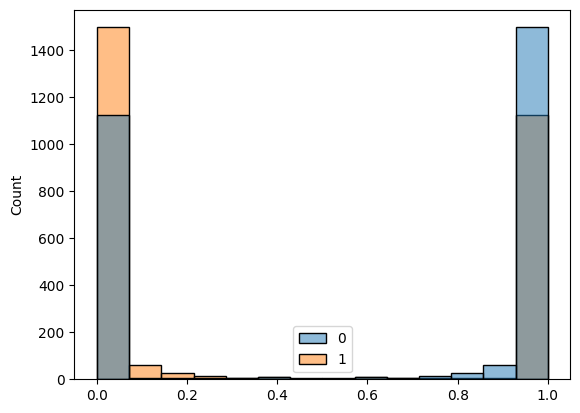

In [ ]:
import seaborn as sns

sns.histplot(model.predict(X_val))

In [ ]:
model.predict(X_val)

array([[9.1247371e-11, 9.9999994e-01],
       [9.9999899e-01, 9.0556887e-07],
       [2.4133281e-10, 9.9999994e-01],
       ...,
       [9.9994785e-01, 5.2108462e-05],
       [9.9999827e-01, 1.6975341e-06],
       [9.4025570e-01, 5.9744321e-02]], dtype=float32)

In [ ]:
y_pred = [*map(np.argmax, model.predict(X_val))]
confusion_matrix(y_val, y_pred)

array([[1580,   29],
       [  42, 1126]])

In [ ]:
model.save(os.path.join(drive_path, model_path+'model_cnn_v2-3.h5'), save_format='h5')

In [ ]:
# new_model = tf.keras.models.load_model(os.path.join(drive_path, model_path+'model_cnn_v2-2.h5'))
# new_model.summary()

# loss, accuracy = new_model.evaluate(X_val, y_val, verbose=0)

# print(f"Loss: %.3f%%" % (loss*100) )
# print(f"Accuracy: %.3f%%" % (accuracy*100) )

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 77, 32)            128       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 38, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 36, 16)            1552      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 18, 16)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 288)               0         
                                                                 
 dense_4 (Dense)             (None, 32)               